<a href="https://colab.research.google.com/github/thuanyvermelho/Engenharia_Dados/blob/main/Pyspark_para_an%C3%A1lise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

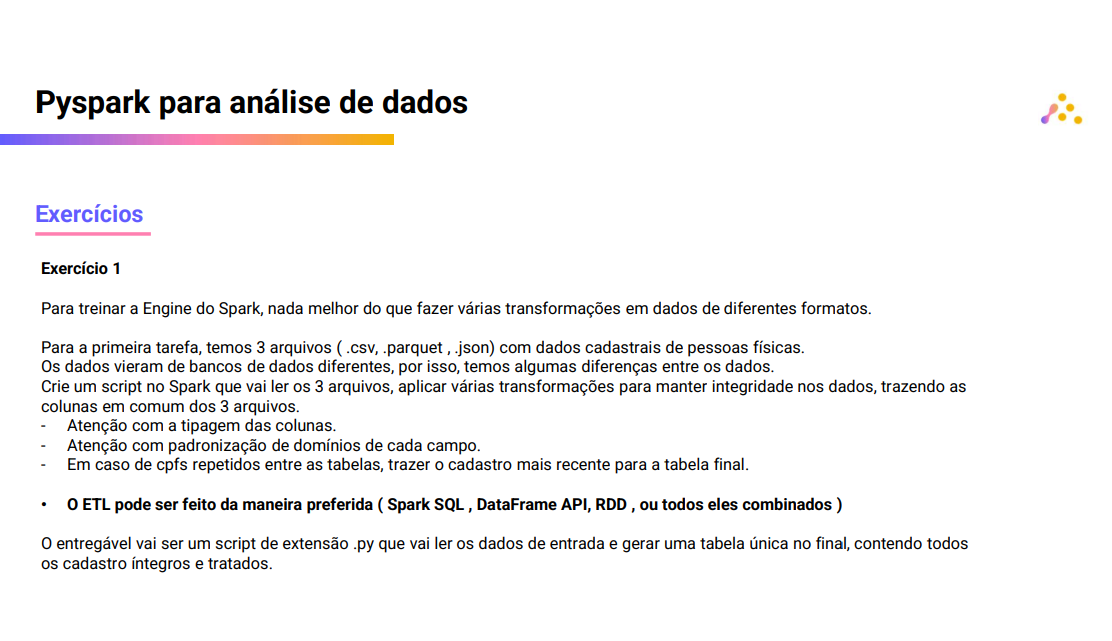

In [93]:
!pip install pyspark

**Mapeamento do Google Drive**

In [94]:
#Mapear nosso Google Drive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Testando Mount com o Google Drive**

In [95]:
#escrevendo um arquivo no nosso Drive para testar o mapeamento
with open('/content/gdrive/My Drive/Colab Notebooks/testando_mount.txt', 'w') as f:
    f.write('content')

**Criando nossa primeira Sessão Spark com SparkSession**

In [96]:
#Criando nossa primeira Sessão com o SparkSession
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Minha Primeira Análise no Pyspark") \
    .config('spark.ui.port', '4050') \
    .getOrCreate()

In [97]:
spark

**Ler arquivos (cvs., Parquet., Json.)**

In [98]:
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

In [99]:
df_parquet = spark.read.parquet("/content/gdrive/MyDrive/Colab Notebooks/Exercicios/dados_cadastro_1.parquet")

In [100]:
# ler o arquivo e corrigir a visualização que estava como |.
#Quando inferSchema está definido como True, o PySpark fará uma varredura no arquivo CSV para determinar os tipos de dados das colunas.
#Isso é útil porque economiza tempo e esforço ao não exigir que você especifique manualmente os tipos de dados para cada coluna,
#especialmente em arquivos CSV com muitas colunas.

df_csv = spark.read.csv("/content/gdrive/MyDrive/Colab Notebooks/Exercicios/dados_cadastro_2.csv", header=True, inferSchema=True, sep='|')

In [101]:
df_json = spark.read.json("/content/gdrive/MyDrive/Colab Notebooks/Exercicios/dados_cadastro_3.json")

**Identificando o schema do arquivo parquet**

In [102]:
df_parquet.printSchema()

root
 |-- documento_cpf: string (nullable = true)
 |-- nome_completo: string (nullable = true)
 |-- data_nascimento: string (nullable = true)
 |-- sexo: string (nullable = true)
 |-- convenio: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cidade: string (nullable = true)
 |-- pais: string (nullable = true)
 |-- data_cadastro: string (nullable = true)
 |-- uf: string (nullable = true)
 |-- __index_level_0__: long (nullable = true)



In [103]:
df_csv.printSchema()

root
 |-- cpf: long (nullable = true)
 |-- nome: string (nullable = true)
 |-- data_nascimento: string (nullable = true)
 |-- sexo: string (nullable = true)
 |-- convenio: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: double (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cidade: string (nullable = true)
 |-- estado: string (nullable = true)
 |-- data_cadastro: string (nullable = true)
 |-- pais_cadastro: string (nullable = true)



In [104]:
df_json.printSchema()

root
 |-- bairro: string (nullable = true)
 |-- cidade: string (nullable = true)
 |-- convenio: string (nullable = true)
 |-- cpf: string (nullable = true)
 |-- data_cadastro: long (nullable = true)
 |-- data_nascimento: string (nullable = true)
 |-- estado: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- nome: string (nullable = true)
 |-- numero: long (nullable = true)
 |-- pais: string (nullable = true)
 |-- sexo: string (nullable = true)



**Exibindo algumas linhas do DataFrame para verificar qual analise e tratamento devemos fazer**

In [105]:
#exibe as 10 primeiras linhas
df_parquet.show(5)

+--------------+--------------------+---------------+----+------------+-------------------+------+-------------+-------------+------+-------------------+---+-----------------+
| documento_cpf|       nome_completo|data_nascimento|sexo|    convenio|         logradouro|numero|       bairro|       cidade|  pais|      data_cadastro| uf|__index_level_0__|
+--------------+--------------------+---------------+----+------------+-------------------+------+-------------+-------------+------+-------------------+---+-----------------+
|390.628.415-89|      Caroline Rocha|     1982-02-28| Fem|  GoodHealth|       Trevo Santos|   773|  Vila Antena|      Cardoso|Brasil|1979-10-19T08:09:16| AC|           207979|
|360.847.952-00|Dr. Luiz Otávio M...|     2020-09-04|Masc|Porto Seguro|Trevo Mariana Alves|   184|  Marmiteiros|    Gonçalves|Brasil|2012-01-22T00:21:53| AC|           518164|
|415.932.076-70|Srta. Emanuelly C...|     2011-10-28| Fem|       Prata| Residencial Mendes|   449|     Vila Puc|        

In [106]:
df_csv.show(5)

+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+----------------+------+-------------------+-------------+
|        cpf|                nome|data_nascimento|sexo|convenio|          logradouro|numero|              bairro|          cidade|estado|      data_cadastro|pais_cadastro|
+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+----------------+------+-------------------+-------------+
| 3687145271|Maria Cecília Duarte|     02/11/1989| Fem|    AMIL|    Jardim Rodrigues| 335.0|         São Geraldo|       Gonçalves|    CE|1970-07-28 10:05:02|           Br|
|40791586375| Maria Cecília Alves|     10/05/1980| Fem|    AMIL|    Viela de Ribeiro| 651.0|             Goiania|Rezende da Praia|    AP|1992-03-12 07:10:16|           Br|
|52983647056|       Laura Cardoso|     02/09/1997| Fem|    AMIL|Pátio Brenda Ribeiro|  64.0|             Acaiaca|   Campos Grande|    PR|197

In [107]:
df_json.show(5)

+--------------------+-------------------+--------+--------------+-------------+------------------+------------------+--------------------+-----------------+------+----+----+
|              bairro|             cidade|convenio|           cpf|data_cadastro|   data_nascimento|            estado|          logradouro|             nome|numero|pais|sexo|
+--------------------+-------------------+--------+--------------+-------------+------------------+------------------+--------------------+-----------------+------+----+----+
|Vila Madre Gertru...|     Ribeiro Grande|    AMIL|573.691.208-21| 817032248000|   August 26, 2017|             Amapá|      Largo de Viana|      Ryan Santos|   886|    |   M|
|               Havaí|Caldeira das Flores|    AMIL|520.936.741-06|1009317437000|  January 30, 2023|Mato Grosso do Sul|  Rodovia Nina Alves|  Juliana Correia|   545|    |   F|
|            Caiçaras|            Barbosa|    AMIL|012.698.435-24| 511111127000|  January 06, 1979|         São Paulo|       

Identificado que as 3 tabelas possuem numero de CPF, porem com padronização diferente.

Primeiro irei padronizar o campo CPF do df_csv

A função ***lpad*** no PySpark é uma função usada para preencher uma string com um caractere específico (ou uma sequência de caracteres) à esquerda até atingir um comprimento desejado.

In [108]:
from pyspark.sql.functions import lpad, col, to_date, expr ,when,substring, lit

In [109]:
# Vamos adicionar zeros à esquerda para completar 11 dígitos
df_csv = df_csv.withColumn("cpf", lpad(col("cpf"), 11, "0"))

In [110]:
df_csv.show()

+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+--------------------+------+-------------------+-------------+
|        cpf|                nome|data_nascimento|sexo|convenio|          logradouro|numero|              bairro|              cidade|estado|      data_cadastro|pais_cadastro|
+-----------+--------------------+---------------+----+--------+--------------------+------+--------------------+--------------------+------+-------------------+-------------+
|03687145271|Maria Cecília Duarte|     02/11/1989| Fem|    AMIL|    Jardim Rodrigues| 335.0|         São Geraldo|           Gonçalves|    CE|1970-07-28 10:05:02|           Br|
|40791586375| Maria Cecília Alves|     10/05/1980| Fem|    AMIL|    Viela de Ribeiro| 651.0|             Goiania|    Rezende da Praia|    AP|1992-03-12 07:10:16|           Br|
|52983647056|       Laura Cardoso|     02/09/1997| Fem|    AMIL|Pátio Brenda Ribeiro|  64.0|             Acaiaca|       

In [111]:
# Renomear a coluna de cpf do DataFrame df_parquet
# Vamos renomear a coluna documento_cpf para "cpf" e corrigir a data pro formato correto

df_parquet = df_parquet.withColumn("data_cadastro", to_date("data_cadastro", "yyyy-MM-dd")) \
                        .withColumnRenamed("documento_cpf", "cpf") \
                        .withColumnRenamed("uf", "estado")

Formatar para que todas as colunas necessarias possuam o mesmo tipo.


In [112]:
df_csv = df_csv.withColumn("data_cadastro", to_date("data_cadastro", "yyyy-MM-dd")) \
                .withColumn("sexo", substring(df_csv["sexo"], 1, 1)) \
                .withColumnRenamed("pais_cadastro", "pais")  \
                .withColumn("cpf", lpad(col("cpf"), 11, "0")) \
                .withColumn("cpf",
                            expr(
                                "substring(cpf, 1, 3) || '.' || "
                                "substring(cpf, 4, 3) || '.' || "
                                "substring(cpf, 7, 3) || '-' || "
                                "substring(cpf, 10, 2)"
                            )
                )

In [113]:
df_csv.show(5)

+--------------+--------------------+---------------+----+--------+--------------------+------+--------------------+----------------+------+-------------+----+
|           cpf|                nome|data_nascimento|sexo|convenio|          logradouro|numero|              bairro|          cidade|estado|data_cadastro|pais|
+--------------+--------------------+---------------+----+--------+--------------------+------+--------------------+----------------+------+-------------+----+
|036.871.452-71|Maria Cecília Duarte|     02/11/1989|   F|    AMIL|    Jardim Rodrigues| 335.0|         São Geraldo|       Gonçalves|    CE|   1970-07-28|  Br|
|407.915.863-75| Maria Cecília Alves|     10/05/1980|   F|    AMIL|    Viela de Ribeiro| 651.0|             Goiania|Rezende da Praia|    AP|   1992-03-12|  Br|
|529.836.470-56|       Laura Cardoso|     02/09/1997|   F|    AMIL|Pátio Brenda Ribeiro|  64.0|             Acaiaca|   Campos Grande|    PR|   1977-01-03|  Br|
|812.673.905-30|         Sophia Melo|   

In [114]:
df_json = df_json.withColumn("data_cadastro", to_date("data_cadastro", "yyyy-mm-dd"))

In [115]:
df_csv.show(truncate=False)

+--------------+----------------------+---------------+----+--------+--------------------------+------+-----------------------------+--------------------+------+-------------+----+
|cpf           |nome                  |data_nascimento|sexo|convenio|logradouro                |numero|bairro                       |cidade              |estado|data_cadastro|pais|
+--------------+----------------------+---------------+----+--------+--------------------------+------+-----------------------------+--------------------+------+-------------+----+
|036.871.452-71|Maria Cecília Duarte  |02/11/1989     |F   |AMIL    |Jardim Rodrigues          |335.0 |São Geraldo                  |Gonçalves           |CE    |1970-07-28   |Br  |
|407.915.863-75|Maria Cecília Alves   |10/05/1980     |F   |AMIL    |Viela de Ribeiro          |651.0 |Goiania                      |Rezende da Praia    |AP    |1992-03-12   |Br  |
|529.836.470-56|Laura Cardoso         |02/09/1997     |F   |AMIL    |Pátio Brenda Ribeiro      

In [116]:
df_json.show(truncate=False)

+-----------------------------+-------------------+--------+--------------+-------------+------------------+------------------+-------------------------------+-----------------------+------+----+----+
|bairro                       |cidade             |convenio|cpf           |data_cadastro|data_nascimento   |estado            |logradouro                     |nome                   |numero|pais|sexo|
+-----------------------------+-------------------+--------+--------------+-------------+------------------+------------------+-------------------------------+-----------------------+------+----+----+
|Vila Madre Gertrudes 3ª Seção|Ribeiro Grande     |AMIL    |573.691.208-21|NULL         |August 26, 2017   |Amapá             |Largo de Viana                 |Ryan Santos            |886   |    |M   |
|Havaí                        |Caldeira das Flores|AMIL    |520.936.741-06|NULL         |January 30, 2023  |Mato Grosso do Sul|Rodovia Nina Alves             |Juliana Correia        |545   |    |F

In [117]:
df_parquet.show(truncate=False)

+--------------+------------------------+---------------+----+------------+------------------------+------+-----------------------+---------------------+------+-------------+------+-----------------+
|cpf           |nome_completo           |data_nascimento|sexo|convenio    |logradouro              |numero|bairro                 |cidade               |pais  |data_cadastro|estado|__index_level_0__|
+--------------+------------------------+---------------+----+------------+------------------------+------+-----------------------+---------------------+------+-------------+------+-----------------+
|390.628.415-89|Caroline Rocha          |1982-02-28     |Fem |GoodHealth  |Trevo Santos            |773   |Vila Antena            |Cardoso              |Brasil|1979-10-19   |AC    |207979           |
|360.847.952-00|Dr. Luiz Otávio Monteiro|2020-09-04     |Masc|Porto Seguro|Trevo Mariana Alves     |184   |Marmiteiros            |Gonçalves            |Brasil|2012-01-22   |AC    |518164           |


**Com as colunas chave estrangeira tratadas, iremos criar um dataframe so com todos os dados e pelo cpf mais atual salvo **

In [118]:
# Adicione uma coluna "origem" para identificar a origem de cada DataFrame
df_csv = df_csv.withColumn("origem", lit("csv"))
df_parquet = df_parquet.withColumn("origem", lit("parquet"))
df_json = df_json.withColumn("origem", lit("json"))

# Ajuste o DataFrame df_parquet para corresponder ao esquema desejado
df_parquet = df_parquet.withColumnRenamed("nome_completo", "nome")

# Selecione as colunas comuns a todos os DataFrames
columns = ["cpf", "nome", "data_nascimento", "sexo", "convenio", "logradouro", "numero", "bairro", "cidade", "estado", "data_cadastro", "pais", "origem"]
df_csv = df_csv.select(columns)
df_parquet = df_parquet.select(columns)
df_json = df_json.select(columns)

In [119]:
# Combine os DataFrames em um único DataFrame
df_tratado = df_csv.union(df_parquet).union(df_json)

In [120]:
# Exiba o DataFrame resultante
df_tratado.show()

+--------------+--------------------+---------------+----+--------+--------------------+------+--------------------+--------------------+------+-------------+----+------+
|           cpf|                nome|data_nascimento|sexo|convenio|          logradouro|numero|              bairro|              cidade|estado|data_cadastro|pais|origem|
+--------------+--------------------+---------------+----+--------+--------------------+------+--------------------+--------------------+------+-------------+----+------+
|036.871.452-71|Maria Cecília Duarte|     02/11/1989|   F|    AMIL|    Jardim Rodrigues| 335.0|         São Geraldo|           Gonçalves|    CE|   1970-07-28|  Br|   csv|
|407.915.863-75| Maria Cecília Alves|     10/05/1980|   F|    AMIL|    Viela de Ribeiro| 651.0|             Goiania|    Rezende da Praia|    AP|   1992-03-12|  Br|   csv|
|529.836.470-56|       Laura Cardoso|     02/09/1997|   F|    AMIL|Pátio Brenda Ribeiro|  64.0|             Acaiaca|       Campos Grande|    PR| 

In [121]:
# Salve o DataFrame resultante em um arquivo Parquet,
df_tratado.write.parquet("tabela_final.parquet", mode="overwrite")

In [122]:
# Conte as linhas no DataFrame
count = df_tratado.count()

In [123]:
print(f"O arquivo Parquet tem {count} linhas.")

O arquivo Parquet tem 2857698 linhas.
